# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [2]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor
#dtype = torch.cuda.FloatTensor ## UNCOMMENT THIS LINE IF YOU'RE ON A GPU!

## MNIST Dataset


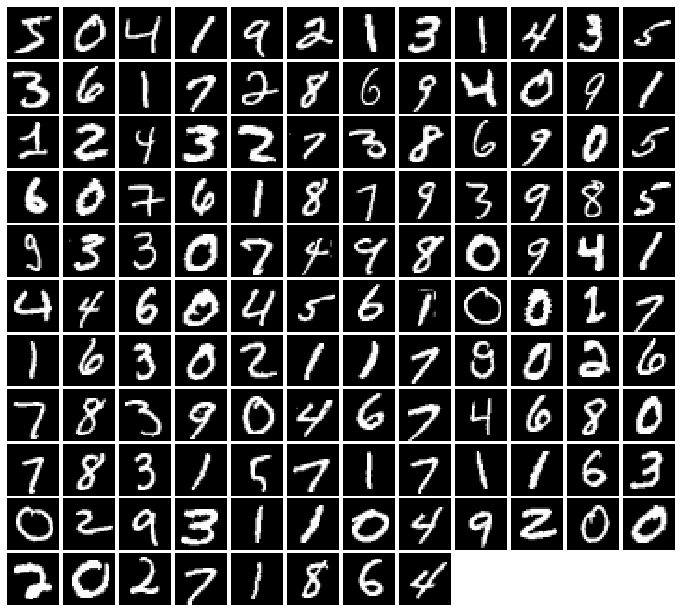

In [4]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [5]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [6]:
# def discriminator():
#     """
#     Initialize and return a simple discriminator model.
#     """
#     model = torch.nn.Sequential( Flatten(),
#                                 torch.nn.Linear(784, 256), 
#                                 torch.nn.LeakyReLU(),
#                                 torch.nn.Linear(256, 256), 
#                                 torch.nn.LeakyReLU(),
#                                 torch.nn.Linear(256, 1)
#     )
#     return model

In [7]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="files/gan_samples/mnist.jpg" width=500>

In [8]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

NameError: name 'discriminator' is not defined

EPOCH:  1
Iter: 0, D: 0.5316, G:0.5128


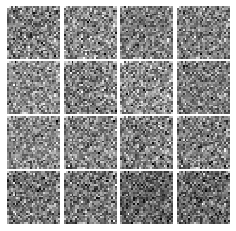


Iter: 250, D: 0.2849, G:0.6784


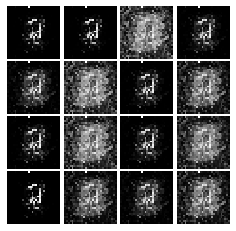


EPOCH:  2
Iter: 500, D: 0.1891, G:0.2155


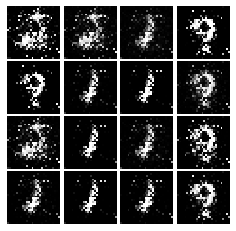


Iter: 750, D: 0.2044, G:0.2426


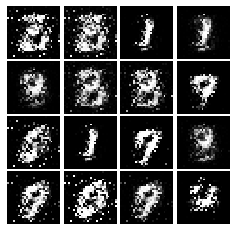


EPOCH:  3
Iter: 1000, D: 0.1472, G:0.2453


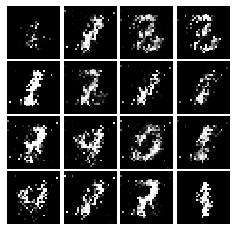


Iter: 1250, D: 0.1452, G:0.2739


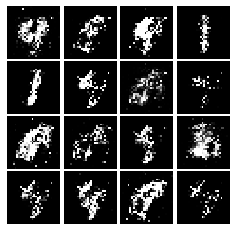


EPOCH:  4
Iter: 1500, D: 0.1744, G:0.189


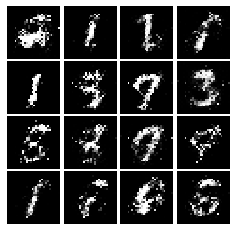


Iter: 1750, D: 0.2002, G:0.2661


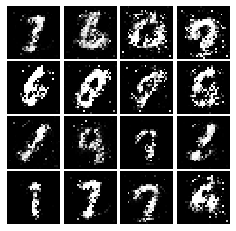


EPOCH:  5
Iter: 2000, D: 0.2182, G:0.2076


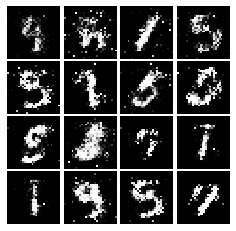


Iter: 2250, D: 0.1898, G:0.184


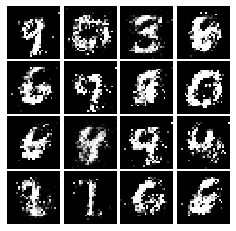


EPOCH:  6
Iter: 2500, D: 0.2193, G:0.2163


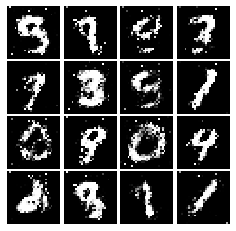


Iter: 2750, D: 0.2378, G:0.1556


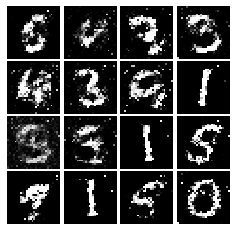


EPOCH:  7
Iter: 3000, D: 0.2271, G:0.1881


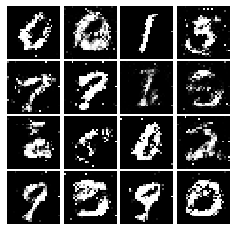


Iter: 3250, D: 0.213, G:0.1754


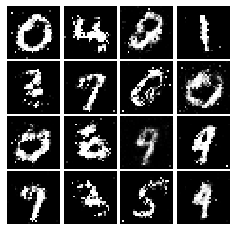


EPOCH:  8
Iter: 3500, D: 0.2175, G:0.2132


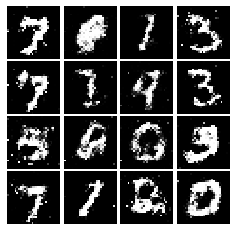


EPOCH:  9
Iter: 3750, D: 0.2149, G:0.187


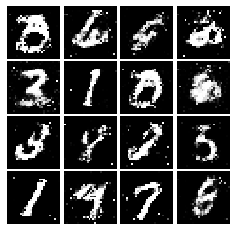


Iter: 4000, D: 0.2303, G:0.1652


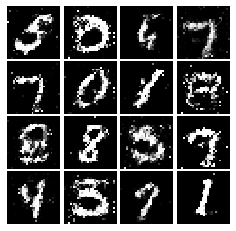


EPOCH:  10
Iter: 4250, D: 0.2196, G:0.1715


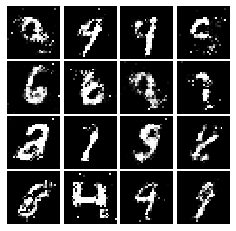


Iter: 4500, D: 0.2316, G:0.1961


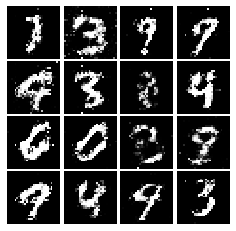

In [12]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)